# Proyek Analisis Data: Nama dataset
- Nama: Paramita Citra Indah Mulia
- Email: paramitamulia@gmail.com
- Id Dicoding: yocimm

## Menentukan Pertanyaan Bisnis

- Bagaimana pola penyewaan sepeda per jam dan per hari?
- Bagaimana jenis hari (libur/kerja) mempengaruhi perilaku penyewaan sepeda?
- Berapa jumlah penyewaan sepeda pada setiap season di setiap tahunnya?
- Berapa total penyewa pengguna terdaftar dan kasual?
- Bagaimana pengaruh kondisi cuaca (seperti suhu, kelembapan, dan kecepatan angin) terhadap permintaan penyewaan sepeda?

## Menyaipkan semua library yang dibuthkan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [ ]:
day_df = pd.read_csv("C:/Users/My-Asus/proyek_analisis_data/final_task_data_analysis/data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
hour_df = pd.read_csv("C:/Users/My-Asus/proyek_analisis_data/final_task_data_analysis/data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


kedua dataset tidak memiliki missing value, namun terdapat kesalahan tipe data pada dteday yang seharusnya datetime bukan object.

### Cleaning Data

In [ ]:
#Merubah tipe data dteday pada kedua dataset
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

In [ ]:
#cek tipe data yang telah diubah
print(day_df['dteday'].dtype)
print(hour_df['dteday'].dtype)

datetime64[ns]
datetime64[ns]


## Exploratory Data Analysis (EDA)

### Explore Data Day

In [ ]:
day_df.describe(include='all')

<ipython-input-9-a3f85d0fb009>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  day_df.describe(include='all')


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000


dapat diketahui:
* data berawal dari 01-01-2011 dan berakhir 31-12-2012
* temperatur tertinggi adalah 0.86 dan terendah 0.059
* atemp terbesar 0.84 dan terendah 0.079
* hum terbesar 0.97 dan terendah 0.0
* windspeed tertinggi 0.50 dan terendah 0.02




In [ ]:
# Hitung total penyewaan berdasarkan hari dalam seminggu
daily_rentals = day_df.groupby('weekday')['cnt'].sum()
daily_rentals

weekday
0    444027
1    455503
2    469109
3    473048
4    485395
5    487790
6    477807
Name: cnt, dtype: int64

dapat diketahui bahwa penyewaan terbanyak adalah pada hari Jumat

In [ ]:
# Menggunakan 'day_df' untuk analisis berbasis harian
pivot_table_season = day_df.pivot_table(values='cnt', index='yr', columns='season', aggfunc='sum')

# Mengganti indeks dan kolom untuk membuatnya lebih mudah dibaca
pivot_table_season.index = ['2011', '2012']
pivot_table_season.columns = ['Spring', 'Summer', 'Fall', 'Winter']

# Menampilkan pivot table
print(pivot_table_season)

      Spring  Summer    Fall  Winter
2011  150000  347316  419650  326137
2012  321348  571273  641479  515476


dapat diketahui penyewaan terbanyak terjadi saat season Fall dan terendah saat season Spring baik pada tahun 2011 maupun 2012

In [ ]:
# Menggunakan 'day_df' untuk analisis berbasis harian
pivot_table_workingday = day_df.pivot_table(values='cnt', index='yr', columns='workingday', aggfunc='sum')

# Mengganti indeks dan kolom untuk membuatnya lebih mudah dibaca
pivot_table_workingday.index = ['2011', '2012']
pivot_table_workingday.columns = ['Holiday/Weekend', 'Working Day']

# Menampilkan pivot table
print(pivot_table_workingday)

      Holiday/Weekend  Working Day
2011           386839       856264
2012           613430      1436146


penyewaan sepeda pada hari kerja lebih banyak daripada holiday/weekend

In [ ]:
#Menghitung jumlah pengguna terdaftar dan kasual
total_registered = day_df['registered'].sum()
total_casual = day_df['casual'].sum()

print(f"Total pengguna terdaftar: {total_registered}")
print(f"Total pengguna kasual: {total_casual}")

Total pengguna terdaftar: 2672662
Total pengguna kasual: 620017


pengguna terdaftar lebih banyak daripada pengguna kasual

### Explore Data Hour

In [ ]:
hour_df.describe(include='all')

<ipython-input-14-8c27de8cc91c>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  hour_df.describe(include='all')


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000


dapat diketahui:
* data berawal dari 01-01-2011 dan berakhir 31-12-2012
* temperatur tertinggi adalah 1.0 dan terendah 0.02
* atemp terbesar 1.0 dan terendah 0.0
* hum terbesar 1.0 dan terendah 0.0
* windspeed tertinggi 0.85 dan terendah 0.0

In [ ]:
# Hitung total penyewaan berdasarkan jam dalam sehari
hourly_rentals = hour_df.groupby('hr')['cnt'].sum()
hourly_rentals

hr
0      39130
1      24164
2      16352
3       8174
4       4428
5      14261
6      55132
7     154171
8     261001
9     159438
10    126257
11    151320
12    184414
13    184919
14    175652
15    183149
16    227748
17    336860
18    309772
19    226789
20    164550
21    125445
22     95612
23     63941
Name: cnt, dtype: int64

sepeda banyak yang disewa di jam 17 dan sedikit sekali disewa di jam 3 pagi

In [ ]:
# Menghitung total penyewaan berdasarkan kondisi cuaca
pivot_table_weather = hour_df.pivot_table(values='cnt', index='weathersit', aggfunc='sum')

# Menambahkan label untuk kondisi cuaca
weather_conditions = {
    1: 'Clear, Few clouds, Partly cloudy',
    2: 'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',
    3: 'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
    4: 'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog',
}
pivot_table_weather.index = pivot_table_weather.index.map(weather_conditions)

# Menampilkan pivot table
print(pivot_table_weather)

                                                        cnt
weathersit                                                 
Clear, Few clouds, Partly cloudy                    2338173
Mist + Cloudy, Mist + Broken clouds, Mist + Few...   795952
Light Snow, Light Rain + Thunderstorm + Scatter...   158331
Heavy Rain + Ice Pallets + Thunderstorm + Mist,...      223


sepeda paling banyak disewa saat cuaca cerah atau berawan dan paling sedikit disewa disaat hujan/petir

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pola penyewaan sepeda per jam dan per hari?

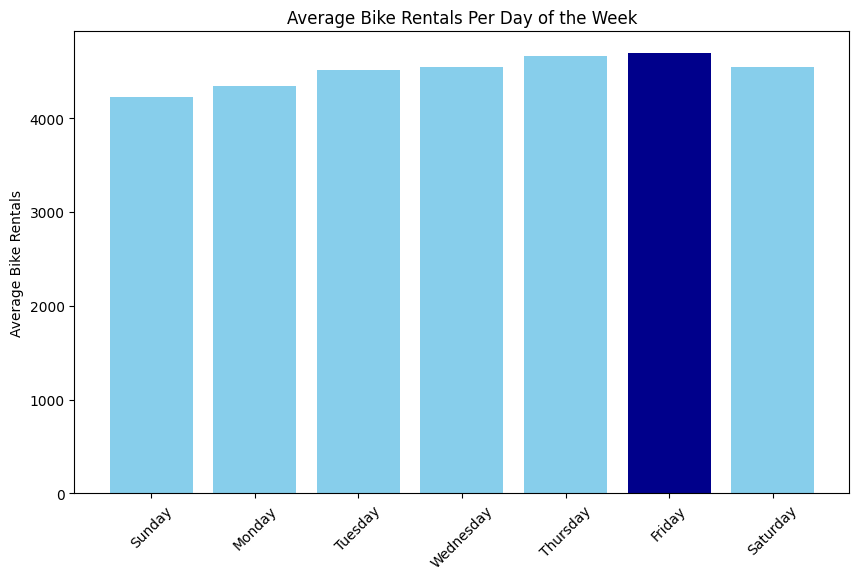

In [ ]:
#sewa sepeda setiap harinya dalam seminggu
#mengelompokkan data berdasarkan 'weekday' dan menghitung rata-rata jumlah sewa per hari
avg_rentals = day_df.groupby('weekday')['cnt'].mean()
days = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]

colors = ['skyblue'] * 7
colors[np.argmax(avg_rentals.values)] = 'darkblue'
plt.figure(figsize=(10,6))
bars = plt.bar(range(7), avg_rentals, color=colors)
plt.xticks(ticks=range(7), labels=days, rotation=45)
plt.ylabel("Average Bike Rentals")
plt.title("Average Bike Rentals Per Day of the Week")
plt.show()

Hari Jumat adalah rata-rata penyewaan sepeda terbanyak

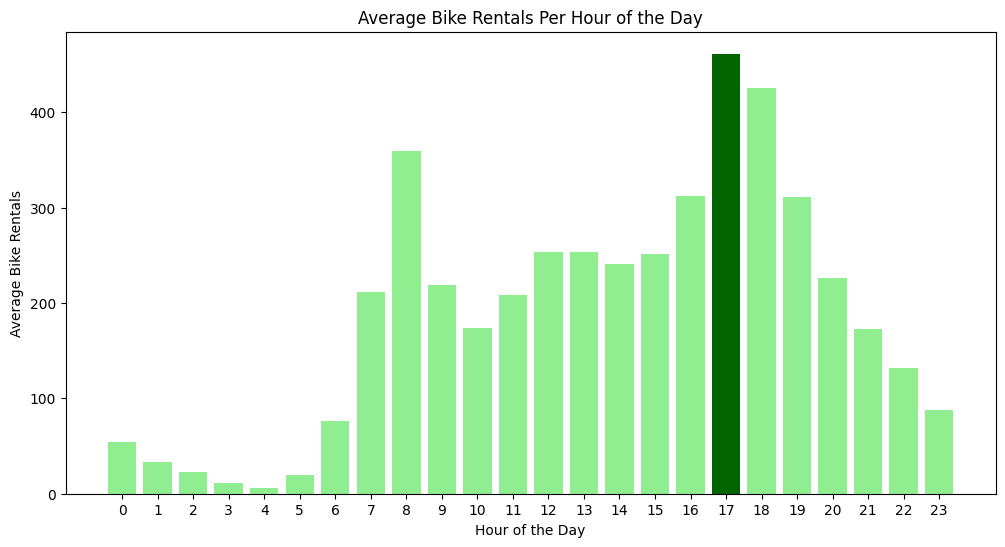

In [ ]:
#sewa sepeda setiap jam nya dalam sehari
#mengelompokkan data berdasarkan 'hr' dan menghitung rata-rata jumlah sewa per jam
avg_rentals_hourly = hour_df.groupby('hr')['cnt'].mean()

colors_hourly = ['lightgreen'] * 24
colors_hourly[np.argmax(avg_rentals_hourly.values)] = 'darkgreen'
plt.figure(figsize=(12,6))
bars_hourly = plt.bar(range(24), avg_rentals_hourly, color=colors_hourly)
plt.xticks(ticks=range(24))
plt.xlabel("Hour of the Day")
plt.ylabel("Average Bike Rentals")
plt.title("Average Bike Rentals Per Hour of the Day")
plt.show()

paling banyak sewa ada pada jam 17 atau jam 5 sore

### Pertanyaan 2: Bagaimana jenis hari (libur/kerja) mempengaruhi perilaku penyewaan sepeda?

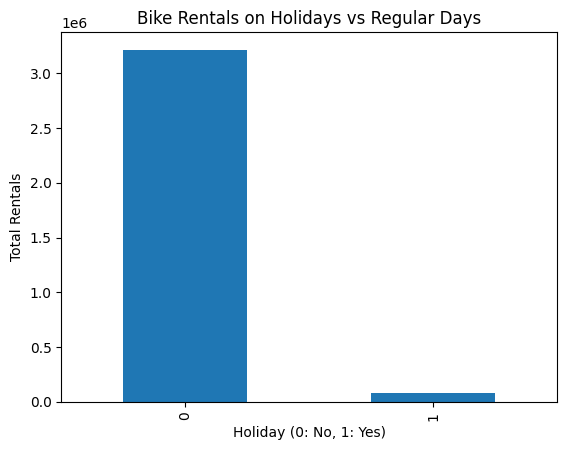

In [ ]:
#penyewaan hari libur dan hari biasa
holiday_rentals = day_df.groupby('holiday')['cnt'].sum()
holiday_rentals.plot(kind='bar')
plt.xlabel('Holiday (0: No, 1: Yes)')
plt.ylabel('Total Rentals')
plt.title('Bike Rentals on Holidays vs Regular Days')
plt.show()

penyewaan sepeda di hari kerja jauh lebih banyak dibandingkan saat weekend/holiday

### Pertanyaan 3: Berapa jumlah penyewaan sepeda pada setiap season di setiap tahunnya?

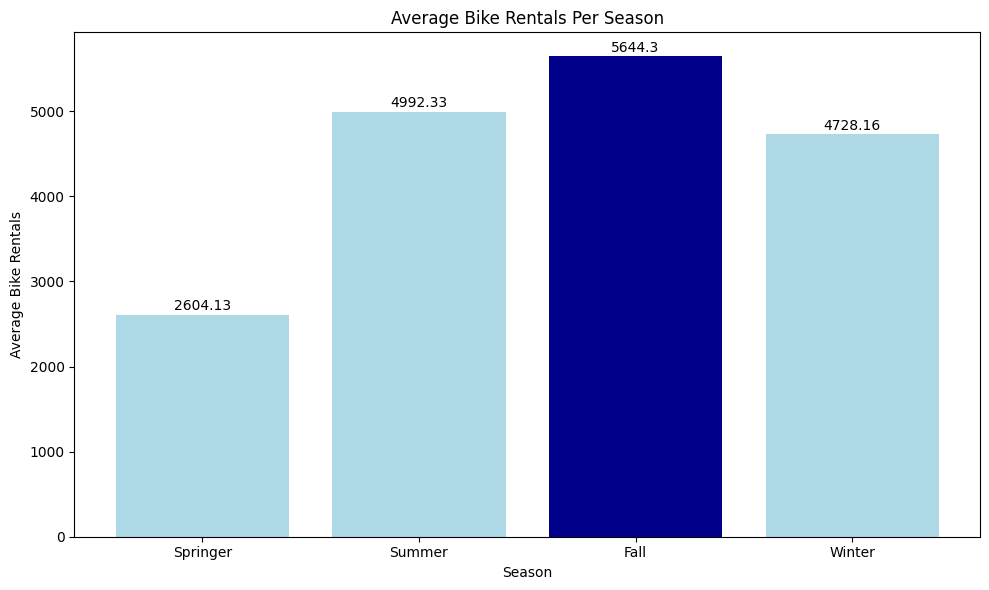

In [ ]:
seasons_dict = {
    1: 'Springer',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
}

# Mengelompokkan data berdasarkan 'season' dan menghitung rata-rata jumlah sewa per musim
avg_rentals_season = day_df.groupby('season')['cnt'].mean()

colors_season = ['lightblue'] * 4
colors_season[np.argmax(avg_rentals_season.values)] = 'darkblue'
plt.figure(figsize=(10,6))
bars_season = plt.bar([seasons_dict[s] for s in avg_rentals_season.index], avg_rentals_season, color=colors_season)

for bar in bars_season:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 20, round(yval,2), ha='center', va='bottom')

plt.xlabel("Season")
plt.ylabel("Average Bike Rentals")
plt.title("Average Bike Rentals Per Season")
plt.tight_layout()
plt.show()


Rata-rata jumlah sewa sepeda saat musim semi yaitu 2.604,13 sewa
Saat musim panas rata-rata sebanyak 4.992,33 sewa
Penyewa sepeda meningkat saat musim gugur yaitu rata-rata sebanyak 5.644,3
Terbanyak sewa ketiga ada di musim dingin yaitu rata-rata sebanyak 4.728,16

### Pertanyaan 4: Berapa total penyewa pengguna terdaftar dan kasual?

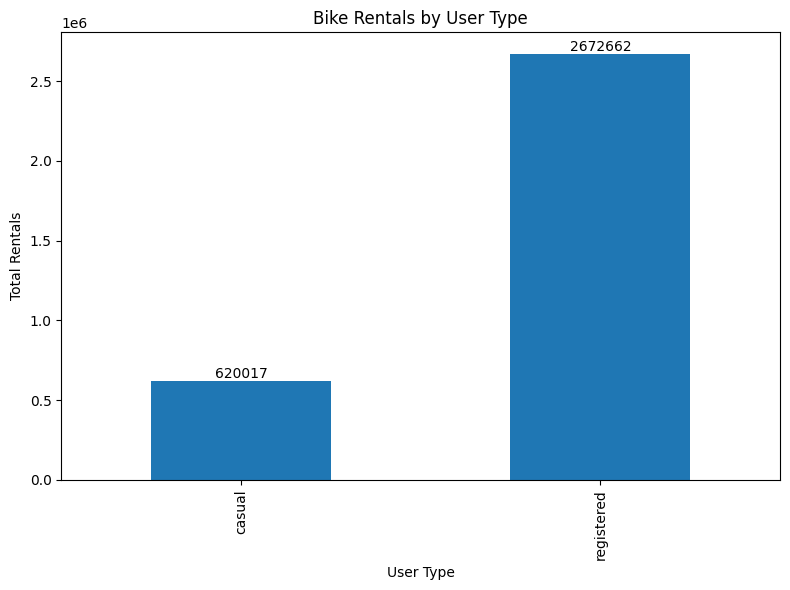

In [ ]:
# Pola sewa antara pengguna terdaftar dan kasual
user_types = day_df[['casual', 'registered']].sum()
ax = user_types.plot(kind='bar', figsize=(8,6))

# Menambahkan angka di atas batang diagram
for i, v in enumerate(user_types.values):
    ax.text(i, v + 100, int(v), ha='center', va='bottom')

plt.xlabel('User Type')
plt.ylabel('Total Rentals')
plt.title('Bike Rentals by User Type')
plt.tight_layout()
plt.show()

jumlah pendaftar registered jauh lebih banyak dibandingkan dengan casual. pengguna terdaftar ada sebanyak 2.672.662 pengguna sedangkan casual sejumlah 620.017 pengguna

### Pertanyaan 5: Bagaimana pengaruh kondisi cuaca (seperti suhu, kelembapan, dan kecepatan angin) terhadap permintaan penyewaan sepeda?

menggunakan geoanalysis

In [ ]:
def categorize_day(row):
    if row['temp'] < 0.25:
        temp_category = 'Dingin'
    elif row['temp'] < 0.5:
        temp_category = 'Sejuk'
    elif row['temp'] < 0.75:
        temp_category = 'Hangat'
    else:
        temp_category = 'Panas'

    if row['hum'] < 0.3:
        hum_category = 'Kering'
    elif row['hum'] < 0.7:
        hum_category = 'Normal'
    else:
        hum_category = 'Lembap'

    if row['windspeed'] < 0.3:
        wind_category = 'Tenang'
    elif row['windspeed'] < 0.6:
        wind_category = 'Sedang'
    else:
        wind_category = 'Kencang'

    weather_map = {
        1: 'Cerah',
        2: 'Berawan/Berkabut',
        3: 'Hujan Ringan/Salju',
        4: 'Hujan Lebat/Salju Besar'
    }
    weather_category = weather_map[row['weathersit']]

    return temp_category, hum_category, wind_category, weather_category

day_df['temp_category'], day_df['hum_category'], day_df['wind_category'], day_df['weather_category'] = zip(*day_df.apply(categorize_day, axis=1))

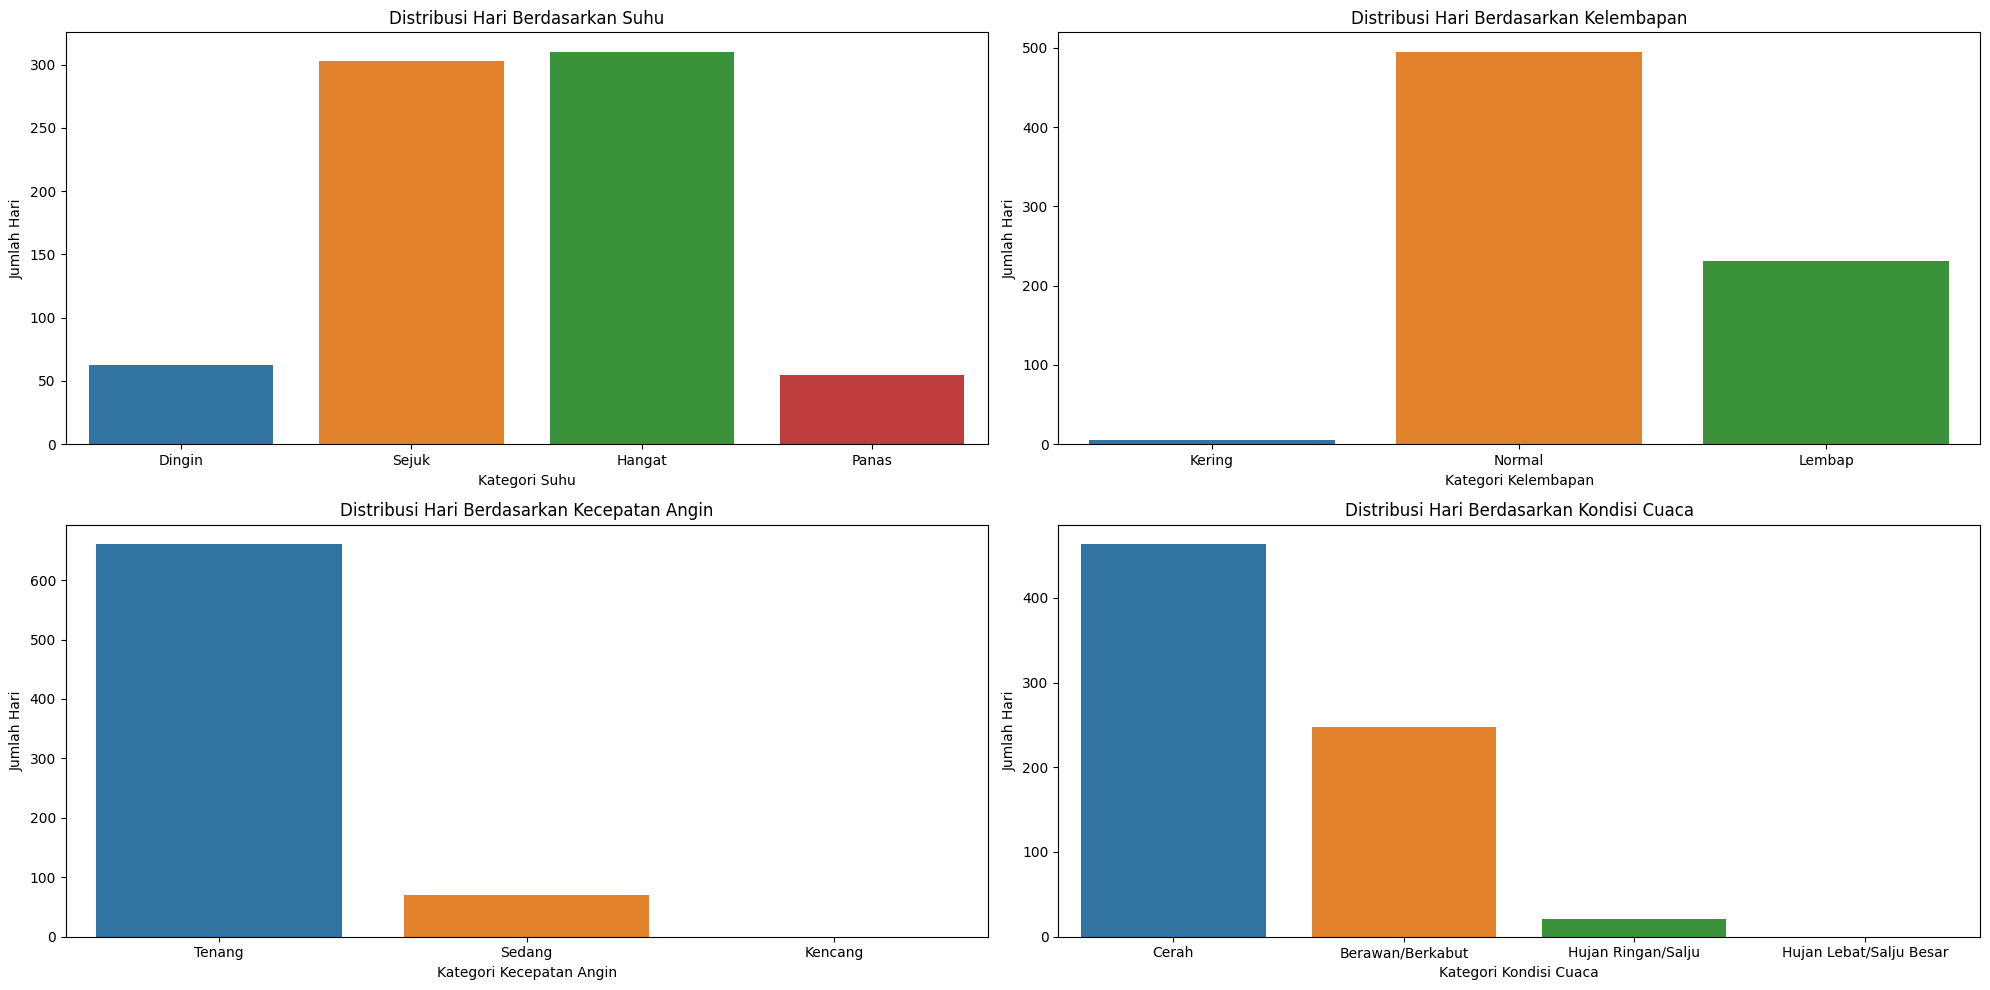

In [ ]:
plt.figure(figsize=(20, 10))

# Visualisasi berdasarkan kategori suhu
plt.subplot(2, 2, 1)
sns.countplot(data=day_df, x='temp_category', order=['Dingin', 'Sejuk', 'Hangat', 'Panas'])
plt.title('Distribusi Hari Berdasarkan Suhu')
plt.xlabel('Kategori Suhu')
plt.ylabel('Jumlah Hari')

# Visualisasi berdasarkan kategori kelembapan
plt.subplot(2, 2, 2)
sns.countplot(data=day_df, x='hum_category', order=['Kering', 'Normal', 'Lembap'])
plt.title('Distribusi Hari Berdasarkan Kelembapan')
plt.xlabel('Kategori Kelembapan')
plt.ylabel('Jumlah Hari')

# Visualisasi berdasarkan kategori kecepatan angin
plt.subplot(2, 2, 3)
sns.countplot(data=day_df, x='wind_category', order=['Tenang', 'Sedang', 'Kencang'])
plt.title('Distribusi Hari Berdasarkan Kecepatan Angin')
plt.xlabel('Kategori Kecepatan Angin')
plt.ylabel('Jumlah Hari')

# Visualisasi berdasarkan kategori kondisi cuaca
plt.subplot(2, 2, 4)
sns.countplot(data=day_df, x='weather_category', order=['Cerah', 'Berawan/Berkabut', 'Hujan Ringan/Salju', 'Hujan Lebat/Salju Besar'])
plt.title('Distribusi Hari Berdasarkan Kondisi Cuaca')
plt.xlabel('Kategori Kondisi Cuaca')
plt.ylabel('Jumlah Hari')

plt.tight_layout()
plt.show()

Sewa sepeda banyak saat udara sejuk dan hangat, kelembapan normal, angin tenang, dan cuaca yang cerah/berawan.

## Conclusion

- Conclution pertanyaan 1 : Sewa sepeda terus naik dari hari Minggu hingga jumat kemudian menurun setelahnya dan berulang. Sewa sepeda terbanyak ada pada hari Jumat dan di jam 17 dan sewa sepeda paling sedikit adalah di hari Minggu dan di jam 3-4 pagi

- Conclution pertanyaan 2 : Cuaca dan jenis hari mempengaruhi penyewaan sepeda. Sewa sepeda jauh lebih banyak disaat cuaca cerah/berawan dan saat working days.

- Conclution pertanyaan 3 : Rata-rata jumlah sewa sepeda saat musim semi yaitu 2.604,13 sewa. Saat musim panas rata-rata sebanyak 4.992,33 sewa.
Penyewa sepeda meningkat saat musim gugur yaitu rata-rata sebanyak 5.644,3 sewa.
Terbanyak sewa ketiga ada di musim dingin yaitu rata-rata sebanyak 4.728,16 sewa.

- Conclution pertanyaan 4 :jumlah pendaftar registered jauh lebih banyak dibandingkan dengan casual. pengguna terdaftar ada sebanyak 2.672.662 pengguna sedangkan casual sejumlah 620.017 pengguna.

- Conclution pertanyaan 5 : Sewa sepeda banyak saat udara sejuk dan hangat, kelembapan normal, angin tenang, dan cuaca yang cerah/berawan.